# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [22]:
# Load pickled data
import pickle

# Folder to store training testing data
data_path = "./data/"

training_file = data_path + "train.p"
validation_file = data_path + "valid.p"
testing_file = data_path + "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Use assert to inform us if X and y have different length
# (Quantity of data points)
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))
print("Data loaded successfully")


Data loaded successfully


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [23]:
# Replace each question mark with the appropriate value.
# Use python, pandas or numpy methods rather than hard coding the results
import pandas as pd

# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
# Use pandas to get unique labels from y_train

df = pd.DataFrame({'label': y_train})
n_classes = len(pd.unique(df.label))

print("Data set statistics")
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Data set statistics
Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Below are samples from the training set.


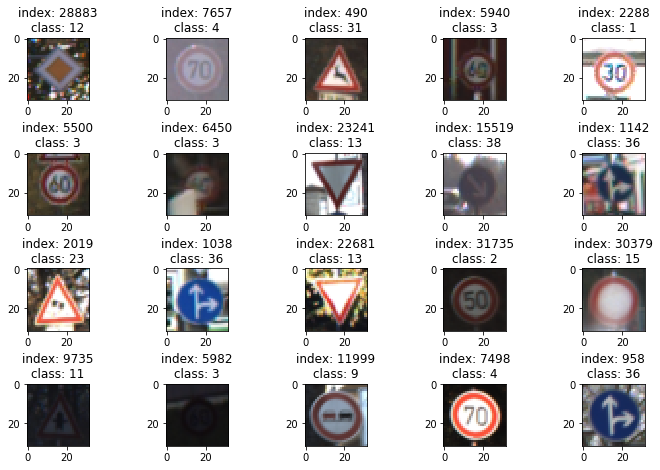

In [24]:
# Code to show sample images from training set
import matplotlib.pyplot as plt
import random

# Visualizations will be shown in the notebook.
%matplotlib inline

# Initialize random number generator to generate always same set of samples
random.seed(a=1234)
number_of_samples = 20

# Here we generate list of random indexes which is used to pick up samples to
sample_indices = [random.randint(0, len(X_train)) for i in range(number_of_samples)]

print("Below are samples from the training set.")


def show_samples(indices, images, labels, cmap='gray'):
    """This functions shows sample images."""
    fig = plt.figure(figsize=(10, 8))
    # i = is loop index; idx is sample index from "sample_indices"
    for i, idx in enumerate(indices):
        image = images[idx]
        a = fig.add_subplot(5, 5, i+1)
        plt.imshow(image, cmap=cmap)
        a.set_title("index: " + str(idx) + "\nclass: " + str(labels[idx]))
    fig.tight_layout(w_pad=0.3, h_pad=0.5)

show_samples(sample_indices, X_train, y_train)


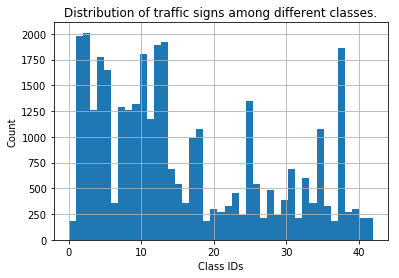

In [25]:
# show histogram of traffic sign counts vs. class ids
n, bins, patches = plt.hist(y_train, 43)

plt.xlabel('Class IDs')
plt.ylabel('Count')
plt.title("Distribution of traffic signs among different classes.")
plt.grid(True)

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set

Data should be optimized before it is fed to the neural network in order to: 
1. make it easier to train
2. prevent overfitting
3. and generally make it more suitable

##### In my code there are following steps in pre-processing pipeline
1. convert RGB to grayscale
   - From grayscale image we are able to extract most of the features
   - Reduce amount of data needed by 3 times
   - It is easier to work with grayscale images
2. Adjust mean to zero
   - Zero mean of data helps neural net to train faster and better
3. Limit range to -1...1
   - by adjusting range of values around 0 it is possible to have zero mean
   - But also it prevents data values going too large which would cause problems when neural net is trained


Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
# Preprocess the data here. Preprocessing steps could include 
# normalization, converting to grayscale, etc.

import numpy as np

def preprocess_tensor_grayscale(tensor_4d):
    """
    This function makes simple RGB to grayscale conversion by calculating
    mean of color channels.
    """
    # TODO: replace below array sum and division operations with np.mean()
    # 0.0 in beginning is for changing data type to float
    X = (0.0 + tensor_4d[:, :, :, 0]
            + tensor_4d[:, :, :, 1]
            + tensor_4d[:, :, :, 2])
    X = X / 3.
    X = X.reshape(X.shape + (1,))
    return X

def preprocess_tensor_adjust_mean(tensor_4d):
    """
    This functions adjusts image mean to very near zero.
    @params
    @x is 4D tensor
    @returns 4D tensor where individual images are adjusted to have zero mean
    """
    # Calculate mean and reshape result array to shape (50, 1)
    mean = np.mean(tensor_4d, axis=(1, 2, 3))
    mean = mean.reshape(mean.shape + (1, ))
    # This is needed when we convert array back to it's original shape
    original_shape = tensor_4d.shape
    # Modify array shape so that we get shape which is (N, img_x*img_y)
    # i.ie input shape is (50,32,32,1) then we convert it to (50, 1024)
    # This will make it easier to apply following subtract operations on array
    X = np.reshape(tensor_4d, (original_shape[0], original_shape[1]**2))
    # Finally we can subtract mean from array to adjust
    # it's mean very near to zero
    X = np.subtract(X[:], mean)
    # Convert array shape (N, (img_x*img_y)) back to original tensor shape
    X = X.reshape(original_shape)
    return X

def preprocess_tensor_adjust_range(tensor_4d):
    """
    This functions adjusts the range of image to -1...1
    input is 4d tensor which is already adjusted to zero mean.
    returns 4d sensor where images maximum range is limited to -1...1
    """
    # Record tensor's original shape. It is needed when we convert array 
    # back to it's original shape
    original_shape = tensor_4d.shape
    # Modify array shape so that we get shape which is (N, img_x*img_y)
    # i.ie input shape is (50,32,32,1) then we convert it to (50, 1024)
    # This will make it easier to apply following subtract operations on array
    reshaped = np.reshape(tensor_4d, (original_shape[0], original_shape[1]**2))
    # Find absolute maximum of each image
    maximum = np.amax(reshaped, axis=1, keepdims=True)
    minimum = np.amin(reshaped, axis=1, keepdims=True)
    abs_max = np.amax((np.abs(maximum), np.abs(minimum)), axis=0)
    # Adjust range to -1...1
    reshaped = reshaped / abs_max
    # Convert array shape (N, (img_x*img_y)) back to original tensor shape
    reshaped = reshaped.reshape(original_shape)
    return reshaped
    

def preprocess_tensor(tensor_4d):
    """
    This function preprocesses image tensor.
    1. convert RGB to grayscale
    2. Adjust mean to zero
    3. Limit range to -1...1
    """
    # Do simple grayscale conversion, first sum all values together
    tensor_4d = preprocess_tensor_grayscale(tensor_4d)
    tensor_4d = preprocess_tensor_adjust_mean(tensor_4d)
    tensor_4d = preprocess_tensor_adjust_range(tensor_4d)
    return tensor_4d


## Data augmentation

Even though there are plenty of training data available in order to prevent over fitting and traing model to generalize better.

### Rotation

First step in data augmentation is to rotate images by: -20, -10, 10 and 20 degrees and then add these 4 additional images to training set besides the original.

<figure>
 <img src="./illustrations/data_rotation.png" width="380" alt="Data augmentation by rotating" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Data is first rotated </p> 
 </figcaption>
</figure>
 <p></p> 

### Shifting

Next step is to shift images 5 pixels into each directions.

<figure>
 <img src="./illustrations/data_augmentation_shift.png" width="380" alt="Data augmentation by shifting" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;">Images are shifted by 5 pixels</p> 
 </figcaption>
</figure>
 <p></p> 

In [7]:
### Data augmentation 
import numpy as np
from scipy import ndimage
# For progress bar
from ipywidgets import FloatProgress, Text
from IPython.display import display


# Define whether we load augmented images from pickle file, This saves several minutes
GENERATE_AUGMENTED_DATA = False

    
def augment_data(x, y, progressbar):
    """
    This function augments training data by doing following transformations
    - Rotate image -20, -10, +10, +20 degrees
    - Shift image 5 pixels in 8 directions
    
    WARNING! it'll take long time to run this function with data sets more than few hundred samples. 
    TODO: Optimize data augmentation
    """
    x_rotated, y_rotated = [], []
    xy_shifts = [( 0, 0,0), ( 0,-5,0), ( 0,5,0), 
                 (-5,-5,0), (-5, 0,0), (-5,5,0), 
                 ( 5,-5,0), ( 5, 0,0), ( 5,5,0)]
    rotations = [-20, -10, 0, 10, 20]
    nsamples = len(x)
    progressbar.max = nsamples * len(rotations)
    progressbar.description = "Rotating"
    for image, label in zip(x[:nsamples], y[:nsamples]):
        for degree in rotations:
            #image_array.append(rotate_image(image, degree))
            x_rotated.append(ndimage.rotate(image, degree, reshape=False))
            y_rotated.append(label)
            progressbar.value += 1
    x_shifted, y_shifted = [], [] 
    progressbar.max = len(x_rotated) * len(xy_shifts)
    progressbar.value = 0
    progressbar.description = "Shifting"
    for image, label in zip(x_rotated, y_rotated):
        for shift in xy_shifts:
            shifted = ndimage.shift(image, shift, mode='nearest')
            x_shifted.append(shifted)
            y_shifted.append(label)
            progressbar.value += 1
    progressbar.description = "Done"
    return np.array(x_shifted), np.array(y_shifted)
    
if GENERATE_AUGMENTED_DATA:
    progressbar = FloatProgress(min=0)
    display(progressbar)
    X_train_augmented, y_train_augmented = augment_data(X_train, y_train, progressbar)
    show_samples(range(2000,2025), X_train_augmented, y_train_augmented, cmap='gray')

    progressbar.description = "Saving"
    with open("./data/augmented_training_data.pickle", "wb") as f:
        data_dict = {}
        data_dict["X_train"] = X_train_augmented
        data_dict["y_train"] = y_train_augmented
        pickle.dump(data_dict, f, pickle.HIGHEST_PROTOCOL)
    
    progressbar.description = "Done"
    # Temporarily free memory, later augmented data is loaded from file
    X_train_augmented, y_train_augmented = None, None

### Model Architecture

Model consist of single-stage deep neural network where are 6 convolutional layers and 3 fully connected layers. Model structure is explained in below image.

<figure>
 <img src="./illustrations/model.png" width="1024" alt="LareNet-6" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;">LareNet-6 Model</p> 
 </figcaption>
</figure>
 <p></p> 

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten


#Define dropout rate
keep_prob = tf.placeholder(tf.float32, name="keep_prob")
# Learning rate decay
global_step = tf.Variable(0, trainable=False, name="global_step")
starter_learning_rate = 0.0002
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                          100000, 0.90, staircase=True, name="learning_rate_decay")
# Features and labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1), name="x")
y = tf.placeholder(tf.int32, (None), name="y")

def LareNet_6(x):
    """
    LareNet-6 model, 9-layers
    """
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 30x30x10. (3 channels x 3 = 9)
    #          Each color channel is individually filtered 3 times
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3,3,1,10), mean = mu, stddev=sigma), name="L1_conv1_W")
    conv1_b = tf.Variable(tf.zeros(10), name="L1_conv1_b")
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1,1,1,1], padding='VALID', name="L1_conv1") + conv1_b
    # Activation.
    conv1 = tf.nn.relu(conv1, name="L1_activation")
    # Pooling. Input = 30x30x10. Output = 15x15x10.
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID', name="L1_pooling")
    
    
    # Layer 2: Convolutional. Input = 15x15x10, Output = 13x13x20.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3,3,10,20), mean = mu, stddev = sigma), name="L2_conv2_W")
    conv2_b = tf.Variable(tf.zeros(20), name="L2_conv2_b")
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1,1,1,1], padding='VALID', name="L2_conv2") + conv2_b
    # Activation.
    conv2 = tf.nn.relu(conv2, name="L2_activation")
    
    
    # Layer 3: Convolutional. Input = 13x13x20, Output = 11x11x32.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3,3,20,32), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(32))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1,1,1,1], padding='VALID') + conv3_b
    # Activation.
    conv3 = tf.nn.relu(conv3)
    
    
    # Layer 4: Convolutional. Input = 11x11x32, Output = 9x9x48.
    conv4_W = tf.Variable(tf.truncated_normal(shape=(3,3,32,48), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(48))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1,1,1,1], padding='VALID') + conv4_b
    # Activation.
    conv4 = tf.nn.relu(conv4)


    # Layer 5: Convolutional. Input = 9x9x48, Output = 7x7x64.
    conv5_W = tf.Variable(tf.truncated_normal(shape=(3,3,48,64), mean = mu, stddev = sigma))
    conv5_b = tf.Variable(tf.zeros(64))
    conv5   = tf.nn.conv2d(conv4, conv5_W, strides=[1,1,1,1], padding='VALID') + conv5_b
    # Activation.
    conv5 = tf.nn.relu(conv5)
    
    
    # Layer 6: Convolutional. Input = 7x7x64, Output = 5x5x128.
    conv6_W = tf.Variable(tf.truncated_normal(shape=(3,3,64,128), mean = mu, stddev = sigma))
    conv6_b = tf.Variable(tf.zeros(128))
    conv6   = tf.nn.conv2d(conv5, conv6_W, strides=[1,1,1,1], padding='VALID') + conv6_b
    # Activation.
    conv6 = tf.nn.relu(conv6)

    # Layer 7-A: Flattening + dropout
    # Flatten. Input = 5x5x96. Output = 3200.
    fc0 = flatten(conv6)
    # Dropout for fully connected layer
    fc0_drop = tf.nn.dropout(fc0, keep_prob)
    
    # Layer 7-B: Fully Connected. Input = 3200. Output = 1024.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(3200,1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(fc0_drop, fc1_W) + fc1_b
    # Activation.
    fc1 = tf.nn.relu(fc1)
    #fc1 = tf.nn.sigmoid(fc1)
    # Dropout for fully connected layer
    fc1_drop = tf.nn.dropout(fc1, keep_prob)

    
    # Layer 8: Fully Connected. Input = 1024. Output = 512.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(1024,512), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(512))
    fc2   = tf.matmul(fc1_drop, fc2_W) + fc2_b
    # Activation.
    fc2 = tf.nn.relu(fc2)
    # Dropout for fully connected layer
    fc2_drop = tf.nn.dropout(fc2, keep_prob)

    
    # Layer 9: Fully Connected. Input = 512. Output = 43.
    # n_classes is Number of traffic sign classes
    fc3_W = tf.Variable(tf.truncated_normal(shape=(512, n_classes), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2_drop, fc3_W) + fc3_b
    return logits


In [9]:
# n_classes is Number of traffic sign classes
one_hot_y = tf.one_hot(y, n_classes, name="one_hot_y")

# Training pipeline
logits = LareNet_6(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y, name="cross_entropy")
loss_operation = tf.reduce_mean(cross_entropy, name="loss_operation")
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, name="optimizer")
training_operation = optimizer.minimize(loss_operation, global_step=global_step, name="training_operation")


In [10]:
# Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1), name="correct_prediction")
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name="accuracy_operation")


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

Model was trained by using augmented training set, number of **epochs** were 100 and batch size 512. I had to limit batch size 512 due to my new GPU was crashing if batch size was bigger. I believe that was due to problems related to GPU utilization rate.

I used the standard Adam-Optimizer which was used also in LeNet exercise. Though there were few papers which recommended Stochastic Gradient Descent (SGD) - optimizer over Adam-optimizer, because SGD was able to achieve higher accuracy. Generally Adam-optimizer is faster than SGD so i selected it because in my case time is money and i needed results fast.

I used decaying learning rate as defined below
```python
starter_learning_rate = 0.0005
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                          100000, 0.90, staircase=True, name="learning_rate_decay")
```

**start learning** rate was set to 0.0005 which seem to work quite well in my case and **decay rate** was set ti 0.9.

#### Final Results
- Training Accuracy = 1.000
- Validation Accuracy = 0.993
- Test Accuracy = 0.974

These results were achieved with following hyperparameters
- Epochs 100
- start-learning rate 0.0002
- learning rate decay 0.90
- keep-prob 0.5

As we can see from results there might be small signs of over fitting because model can't generalize well on test set.

Training took totally 6001 seconds for 100 epochs and on average it took 60.01 seconds / epoch.

#### Others
I have been trying different approaches to the problem and in beginning i was using un-processed RGB images which i fed directly to neural network. That network was also quite deep as there were 8 layers. It was almost same than than final model except that the convolutional layers were more deep because of 3 color channels and first fully connected layer was quite wide, almost 8000 neurons. Anyhow it achieved +98% accuracy on validation set, but was bit heavy.

In order to optimize things i switched to grayscale images and bit light weight model (LareNet-6) this seems to be working quite ok on test set.

Then have to keep in mind that achiecing +99.5% needs different approach, perhaps multi-stack net where input image has grayscale and color information. Also pre-processing needs some other improvments for image contrast and lightness control.

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


Loading augmented data from file....
Total number of training samples is 1565955
Training data is divided into 3058 batches.
Preprocessing images
Training took totally 6001 seconds for 100 epochs and on average it took 60.01 seconds / epoch

Final training accuracy is 1.000
Final validation accuracy is 0.990


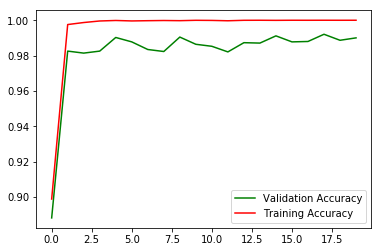

Model saved as  ./larenet_6


In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.


# Set to True if you want to train the model as training will take a long time it's better to load model from file.
TRAIN_MODEL = True
if TRAIN_MODEL:
    from sklearn.utils import shuffle
    import pickle
    # For progress bar
    from ipywidgets import FloatProgress, Text
    from IPython.display import display

    #Initialize progress bar
    progressbar = FloatProgress(min=0, description='Batch')
    progressbar_total = FloatProgress(min=0, description='Waiting....')
    infotext = Text(placeholder="Waiting for first round to be validated")
    display(progressbar)
    display(progressbar_total)
    display(infotext)
    
    # Set to true if you want to load augmented training data from file
    LOAD_AUGMENTED_FROM_FILE = True
    if LOAD_AUGMENTED_FROM_FILE:
        print("Loading augmented data from file....")
        with open("./data/augmented_training_data.pickle", 'rb') as f:
            # The protocol version used is detected automatically, so we do not
            # have to specify it.
            data = pickle.load(f)
            X_train = data["X_train"]
            y_train = data["y_train"]
            #print("Done")
            print("Total number of training samples is {}".format(len(X_train)))

    # Training the model
    import time
    validationaccuracylog = [] # store validation accuracies into this list from each EPOCH
    trainingaccuracylog = [] # store training accuracies into this list from each EPOCH
    validation_accuracy = 0
    training_accuracy = 0
    EPOCHS = 100
    BATCH_SIZE = 512
    
    progressbar_total.description = "Open Sess"
    saver = tf.train.Saver()
    with tf.Session() as sess:
        start = time.time()
        progressbar_total.max = EPOCHS
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)
        num_batches = num_examples/BATCH_SIZE
        progressbar.max = num_batches
        print("Training data is divided into {:d} batches.".format(int(num_batches)))
        print("Preprocessing images")
        if X_train.shape[3] == 3:
            X_train = preprocess_tensor(X_train)
        if X_valid.shape[3] == 3:
            X_valid = preprocess_tensor(X_valid)
        for i in range(EPOCHS):
            progressbar_total.description = "Training"
            X_train, y_train = shuffle(X_train, y_train)
            nbatch = 0
            progressbar.value = 0
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                nbatch += 1
                progressbar.value = nbatch
                progressbar.description = "Batch {}".format(nbatch)
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.50})
            if i % 5 == 0: # Validate on every 10th epoch in order to save time
                progressbar_total.description = "Validating"
                validation_accuracy = evaluate(X_valid, y_valid)
                training_accuracy = evaluate(X_train, y_train)
                validationaccuracylog.append(validation_accuracy)
                trainingaccuracylog.append(training_accuracy)
                infotext.value = "EPOCH {}. ".format(i+1) + "Validation Accuracy = {:.3f}".format(validation_accuracy)
                # print("Epoch {} Validation accuracy {:.3f}".format(i, validation_accuracy))
            progressbar_total.value += 1
            infotext.value = "EPOCH {}. ".format(i+1) 
        stop = time.time()
        print("Training took totally {:.0f} seconds for {} epochs \
and on average it took {:.2f} seconds / epoch".format(stop-start, EPOCHS, (stop-start)/EPOCHS))
        print()
        print("Final training accuracy is {:.3f}".format(training_accuracy))
        print("Final validation accuracy is {:.3f}".format(validation_accuracy))
        plt.plot(validationaccuracylog, 'g-', label='Validation Accuracy')
        plt.plot(trainingaccuracylog, 'r-', label="Training Accuracy")
        plt.legend()
        plt.show()
        #model_file_name = './larenet_6_{:d}'.format(int(stop))
        model_file_name = './larenet_6'
        saver.save(sess, model_file_name)
        tf.train.export_meta_graph(model_file_name + '.meta')
        print("Model saved as ", model_file_name)

In [12]:
# Load model from file and run evaluation for training, validation and test sets
# Note! It might be needed to restart kernel and run all above cells WITHOUT training
import tensorflow as tf
import numpy as np

# tf.reset_default_graph()

BATCH_SIZE = 512
with tf.Session() as sess:
    # Preprocess data if needed
    print("Loading data....")
    if X_train.shape[3] == 3:
        print("Preprocessing training data")
        X_train = preprocess_tensor(X_train)
    if X_valid.shape[3] == 3:
        print("Preprocessing validation data")
        X_valid = preprocess_tensor(X_valid)
    if X_test.shape[3] == 3:
        print("Preprocessing test data")
        X_test = preprocess_tensor(X_test)
    print("Data loaded successfully")
    print("\tTraining data ", X_train.shape)
    print("\tValidation data ", X_valid.shape)
    print("\tTesting data ", X_test.shape)
    print("Importing model...")
    loader = tf.train.Saver()
    # loader = tf.train.import_meta_graph('./larenet_6.meta', clear_devices=True)
    loader.restore(sess, "./larenet_6")
    # tf variables need to be initialized first
    #
    print("Model loaded...")
    #init = tf.global_variables_initializer()
    #sess.run(init)
    
    # Run model evaluation with train, valida and test sets
    print("Evaluating model...")
    training_accuracy = evaluate(X_train, y_train)
    validation_accuracy = evaluate(X_valid, y_valid)
    test_accuracy = evaluate(X_test, y_test)
    print("\n\nThese results are calculated by using saved model.")
    print("\tTraining Accuracy = {:.3f}".format(training_accuracy))
    print("\tValidation Accuracy = {:.3f}".format(validation_accuracy))
    print("\tTest Accuracy = {:.3f}".format(test_accuracy))


Loading data....
Preprocessing test data
Data loaded successfully
	Training data  (1565955, 32, 32, 1)
	Validation data  (4410, 32, 32, 1)
	Testing data  (12630, 32, 32, 1)
Importing model...
Model loaded...
Evaluating model...


These results are calculated by using saved model.
	Training Accuracy = 1.000
	Validation Accuracy = 0.993
	Test Accuracy = 0.974


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [13]:
# Load sign class numbers and descriptions from file
import csv
# Dictionary mapping where key is sign's class and value is it's description
sign_names = {}
with open('signnames.csv', newline='') as csvfile:
    for row in csv.DictReader(csvfile, delimiter=','):
        sign_names[int(row['ClassId'])] = row['SignName']

### Load and Output the Images

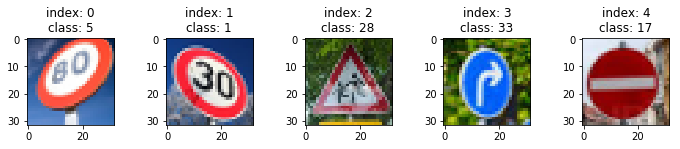

In [14]:
# Load the images and plot them here.
# Feel free to use as many code cells as needed.
# import tensorflow as tf

import os, fnmatch
from scipy import misc
import numpy as np

test_img_path = "./test_images/" # Test images are stored here

X_test_images = []
y_test_images = []
# Load image filenames and ClassIds from CSV file
with open(test_img_path + "test_images.csv", newline='') as csvfile:
    headers = next(csvfile, None)
    for row in csv.reader(csvfile, delimiter=','):
        #sign_names[int(row['ClassId'])] = row['SignName']
        img = misc.imread(test_img_path + row[0])
        shape = img.shape
        # Ensure that image has correct shape
        assert(shape == (32, 32, 3)), "Shape of image file {} is {}, but (32, 32, 3) was expected".format(row[0], shape)
        X_test_images.append(img)
        y_test_images.append(row[1])
    X_test_images = np.array(X_test_images)
    y_test_images = np.array(y_test_images)

# Show loaded test images from disk
nsamples = len(X_test_images)
show_samples(range(0, nsamples), X_test_images, y_test_images)


Few comments about these german traffic signs
Comments are per image index
0. For human it seems to be obvious that it is 80km/h speed limit sign, but when you look closely the upper part of the eight is bit blurred
1. Looks clear, shouldn't be problem
2. Some reflections on sign, may pose a problem
3. Clear sign, shouldn't be problem
4. Clear sign, shouldn't be problem

### Predict the Sign Type for Each Image

In [16]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

import tensorflow as tf
results = None
with tf.Session() as sess:
    if X_test_images.shape[3] == 3:
        X_test_images = preprocess_tensor(X_test_images)
    # saver = tf.train.import_meta_graph('./larenet_6.meta')
    saver = tf.train.Saver()
    saver.restore(sess, "./larenet_6")
    #init = tf.global_variables_initializer()
    #sess.run(init)
    print("Session restored\n")
    # result is array of [predicted labels, ground-truth labels]
    results = sess.run([tf.argmax(logits, 1), tf.argmax(one_hot_y, 1)], 
                      feed_dict={x: X_test_images, y: y_test_images, keep_prob:1.0})
    print("Index, Truth, Prediction, Description (Predicted)")
    for i, pred in enumerate(results[0]):
        print("{:5d}  {:5d}  {:10d}  {:15s}".format(i, int(y_test_images[i]), pred, sign_names[pred]))
    


Session restored

Index, Truth, Prediction, Description (Predicted)
    0      5          10  No passing for vehicles over 3.5 metric tons
    1      1           1  Speed limit (30km/h)
    2     28          28  Children crossing
    3     33          33  Turn right ahead
    4     17          17  No entry       


### Analyze Performance

In [17]:
# Calculate the accuracy for these 5 new images. 
# For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

corr = 0  # counter for correct predictions
for pred, gt in zip(results[0], results[1]):
    corr += pred == gt  # If results are equal it will return 1 and therefore increases our counter
print("Model predicted {} signs correctly out of {}".format(corr, len(results[0])))
print("Prediction accuracy is {}% for 5 test images downloaded from web".format(100*corr/len(results[0])))



Model predicted 4 signs correctly out of 5
Prediction accuracy is 80.0% for 5 test images downloaded from web


All other traffic signs were predicted correctly. It's bit difficult to say why this happen. If you look number "8" very closely you could see that upper half of the eight could also prepresent number 6 as part of the number 8 could be seen as "noise". This results were obtained by training model 100 epochs.

When trained 50 epocs the 80km/h sign was mis-classified as 60km/h.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:


In [18]:
# Support functions
import numpy as np
import matplotlib.pyplot as plt

def map_classids_to_names(classids, mapping):
    """
    This functions maps list of Class IDs to corresponding class description.

    Parameters
    ----------
    classids : list
        List of class ids to be mapped
    mapping : dictionary
        Dictionary where key is class id and value it's description

    Returns
    -------
    list
        List of corresponding class id names
    """
    return list(map(lambda classid: mapping[classid], classids))


def create_propability_bar(propabilities, classids, mapping):
    """
    This functions creates a horizontal bar graph of propabilities.

    Parameters
    ----------
    propabilities: list
        List of propabilities
    classids : list
        Corresponding list of propabilities classids
    mapping : dictionary
        Dictionary where key is class id and value it's description

    Returns
    -------
    graph
        Propabilites plotted in descending order
    """
    y_position = list(range(0, len(propabilities)))
    y_position.reverse()
    graph = plt.barh(bottom=y_position,
                     width=propabilities,
                     tick_label=map_classids_to_names(classids, mapping))
    return graph


def show_topk(X, y, topk, mapping, nmax=25):
    """
    This functions shows test images with corresponding ClassIds.

    Parameters
    ----------
    X: numpy array
        4D tensor array where dimensions are
        (N, img width, img height, channels)
    y : numpy array
        1D list of corresponding class Ids of X
    topk : numpy array
        2D list of topk propabilities and class ids of the test set
    mapping : dictionary
        Dictionary where key is class id and value it's description
    nmax : integer
        Number of maximum data points(images) to be analyzed
    """
    fig = plt.figure(figsize=(15, 20)) # Plot size in inches
    ncols = 2  # Number of columns in plot
    nrows = 15 # Number of rows in plot
    for i, props in enumerate(zip(topk[0], topk[1])):
        # subplot(nrows, ncols, plot_number)
        # Calculate plot numbers so that image is shown on top and bar plots under images
        img_plot_number = 1 + (int(i / (ncols)) * ncols*2) + i % ncols
        bar_plot_number = img_plot_number + ncols
        
        a = fig.add_subplot(nrows, ncols, img_plot_number)
        # Use sign description as title
        a.set_title(sign_names[y[i]])
        plt.imshow(X[i].squeeze(), cmap="gray")
        b = fig.add_subplot(nrows, ncols, bar_plot_number)
        create_propability_bar(props[0], props[1], sign_names)
        #print(props[0], props[1])
        #b.set_title("Propabilities")
    fig.tight_layout(h_pad=0.5)
    plt.show()


In [19]:
# Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

result = None
with tf.Session() as sess:
    #saver = tf.train.import_meta_graph('./larenet_6.meta')
    saver = tf.train.Saver()
    saver.restore(sess, "./larenet_6")
    #init = tf.global_variables_initializer()
    #sess.run(init)
    print("Session restored")
    result = sess.run([tf.argmax(logits, 1), tf.argmax(one_hot_y, 1), tf.nn.top_k(tf.nn.softmax(logits), k=5)], 
                      feed_dict={x: X_test_images, y: y_test_images, keep_prob:1.0})
    # result array: 0 = predicted class, 1 = top_k values, 2 = ground truth

        

Session restored


Visualization of topk propabitlies:



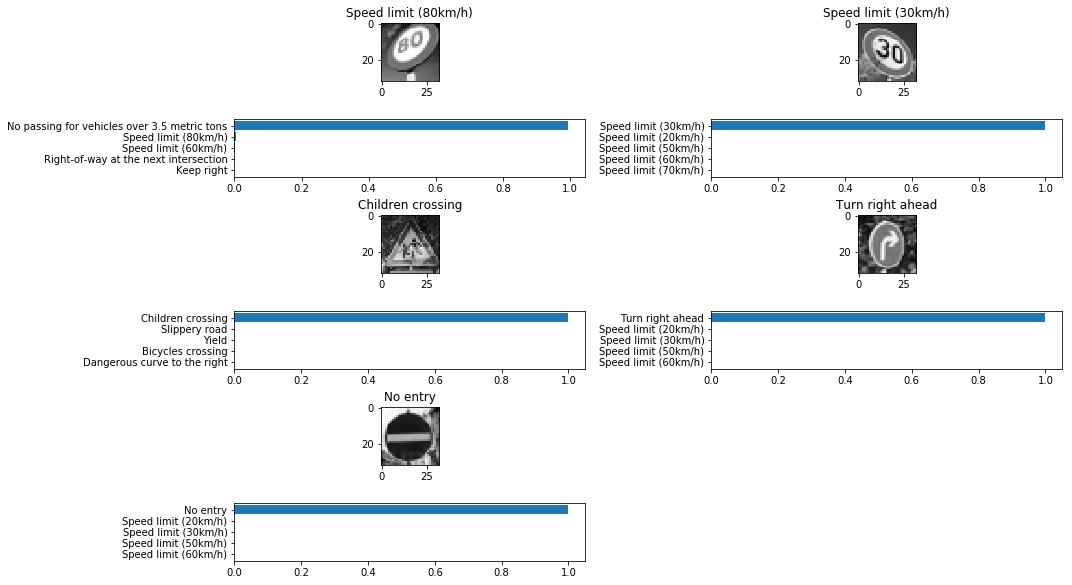


And for reference topk softmax propabilites in raw print are:


TopKV2(values=array([[  9.95163918e-01,   4.45675803e-03,   3.67602042e-04,
          1.16890224e-05,   1.63382630e-09],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   6.26649720e-13,   1.94863476e-16,
          6.80658104e-20,   2.10285894e-22],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00]], dtype=float32), indices=array([[10,  5,  3, 11, 38],
       [ 1,  0,  2,  3,  4],
       [28, 23, 13, 29, 20],
       [33,  0,  1,  2,  3],
       [17,  0,  1,  2,  3]], dtype=int32))


In [20]:
# Illustrate topk-5 propabilities
pred = result[0]
y_ = result[1]
topk = result[2]

print("Visualization of topk propabitlies:\n")
show_topk(X_test_images, y_, topk, sign_names)
print("\nAnd for reference topk softmax propabilites in raw print are:\n\n")
print(topk)

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [21]:
### Visualize network's feature maps

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    """
    Visualizes network's activation maps
    
    Parameters
    ----------
    image_input: numpy array
        the test image being fed into the network to produce the feature maps.
        Should be 4D tensor which contains single image
    tf_activation : tf variable
        should be a tf variable name used during your training procedure that 
        represents the calculated state of a specific weight layer
    activation_min : integer
        can be used to view the activation contrast in more detail, by default 
        matplot sets min and max to the actual min and max values of the output
    activation_max : integer
        can be used to view the activation contrast in more detail, by default 
        matplot sets min and max to the actual min and max values of the output
    plt_num : integer
        used to plot out multiple different weight feature map sets on the same 
        block, just extend the plt number for each new feature map entry
    """
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    #image_input = 
    # Note: x should be the same name as your network's tensorflow data 
    #       placeholder variable
    # If you get an error tf_activation is not defined it maybe having 
    # trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", 
                       vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", 
                       vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", 
                       vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

Session restored


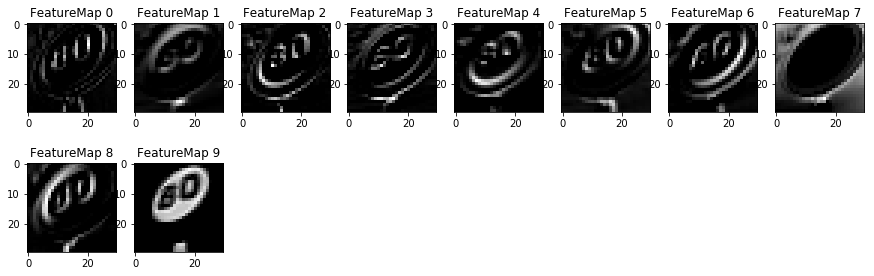

In [34]:
with tf.Session() as sess:
    #saver = tf.train.import_meta_graph('./larenet_6.meta')
    saver = tf.train.Saver()
    saver.restore(sess, "./larenet_6")
    #init = tf.global_variables_initializer()
    #sess.run(init)
    print("Session restored")
    #L1_act = sess.graph.get_tensor_by_name('Relu:2')
    L1_conv1 = sess.graph.get_tensor_by_name("L1_conv1:0")
    L1_pooling = sess.graph.get_tensor_by_name("L1_pooling:0")
    L1_activation = sess.graph.get_tensor_by_name("L1_activation:0")
    outputFeatureMap(X_test_images[:1], L1_activation, activation_min=-1, activation_max=-1 ,plt_num=1)
    #outputFeatureMap(X_test_images[:1], L1_pooling, activation_min=-1, activation_max=-1 ,plt_num=1)
    #result = sess.run([tf.argmax(logits, 1), tf.argmax(one_hot_y, 1), tf.nn.top_k(logits, k=5)], 
    #                  feed_dict={x: X_test_images, y: y_test_images, keep_prob:1.0})
    # result array: 0 = predicted class, 1 = top_k values, 2 = ground truth

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:** I did analysis for Layer 1 convolution and activation and saw that there is indeed very interesting features extractred from the input image. By using this tool it would be good to check that network can successfully extract features from images.

For example the layer 1 convolution looks quite stunning.

<figure>
 <img src="./illustrations/L1_conv1.png" width="380" alt="L1 Convolution" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> L1 convolution</p> 
 </figcaption>
</figure>
 <p></p> 
After convolution there is Layer 1 activation with RELU which looks like this 
<figure>
 <img src="./illustrations/L1_activation.png" width="380" alt="L1 Activation with ReLU" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;">L1 Activation with ReLU</p> 
 </figcaption>
</figure>
 <p></p> 



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 